## Sentiment analysis Using linear regression
1. Download and import dataset
2. Clean, rename columns, check data
3. Tokenize words
4. Train model
5. Check accuracy
6. Run AUC, F1
 
 
**Extras**
- Build Binary classifier
- Interpet results
- Print words with the most positive and negative weights

In [18]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-07-31 18:58:04--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3,3M) [text/csv]
Saving to: 'AirlineTweets.csv'

     0K .......... .......... .......... .......... ..........  1% 1,28M 3s
    50K .......... .......... .......... .......... ..........  2%  602K 4s
   100K .......... .......... .......... .......... ..........  4%  299K 6s
   150K .......... .......... .......... .......... ..........  5% 77,7K 15s
   200K .......... .......... .......... .......... ..........  7% 84,1M 12s
   250K .......... .......... .......... .......... ..........  8% 24,1M 9s
   300K .......... .......... .......... .......... .......... 10%  154M 8s
   350K .......... .......... .......... .......... .......... 11%  406K 8s
   400K .......... .........

In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.pipeline import make_pipeline




In [2]:
threshold = 0.5 # confidence in sentiment threshold 

def process_string(s):
    # Split the string on spaces
    words = s.split()
    
    # Remove one element (e.g., the second element, index 1)

    words.pop(0)
    
    # Rejoin the list into a string
    return ' '.join(words)


df = pd.read_csv('AirlineTweets.csv',delimiter=",")
df = df[df['airline_sentiment_confidence']>threshold]
df = df[['airline_sentiment','text']]

# Apply the function to each row in the DataFrame
df['text'] = df['text'].apply(process_string)

sentiment = df["airline_sentiment"]
text = df["text"]

# Display the first few rows of the DataFrame
df.head()
print(f"Number of samples: {len(df)}")

Number of samples: 14404


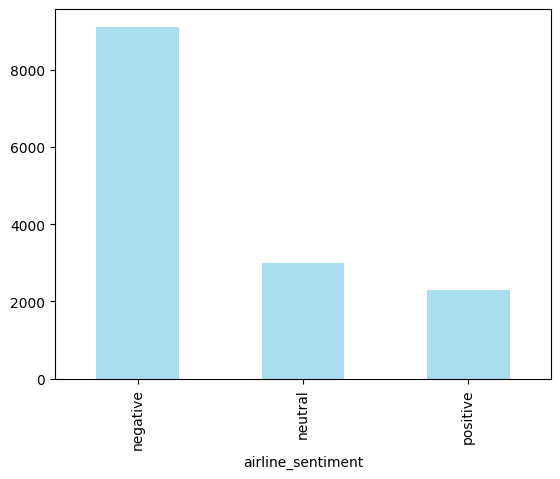

In [3]:
#TODO: create a function that splits the data but keeps the same percentage of each class in both train and test
# Check for class imbalance

test_plots = df['airline_sentiment'].value_counts()
test_plots.plot(kind='bar', color='skyblue', alpha=0.7)
plt.show()

In [4]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

Y = sentiment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



In [5]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [6]:
preds = model.predict(X_test)
accuracy = accuracy_score(y_test,preds)
print(f"model accuracy:{accuracy}")

model accuracy:0.8116612679315132


In [7]:
# Sample custom text for prediction
custom_text = ["it sucked", "it was awesome"]

# Transform the custom text using the same vectorizer
custom_text_vectorized = vectorizer.transform(custom_text)

# Make the prediction
predictions = model.predict(custom_text_vectorized)

# Display the predictions
for text, prediction in zip(custom_text, predictions):
    print(f"Text: {text}\nPrediction: {prediction}\n")

Text: it sucked
Prediction: neutral

Text: it was awesome
Prediction: positive

